#### State the Hypothesis
- Null Hypothesis (H₀): The median final exam score for students who went through the new curriculum is 75 (same as the previous year).
- Alternative Hypothesis (H₁): The median final exam score for students who went through the new curriculum is greater than 75.

Mathematically:

- 𝐻0:Median=75
- 𝐻1:Median>75


In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

In [2]:
# Data
data = [78, 100, 75, 64, 87, 80, 72, 91, 89, 70, 82, 76]
hypothesized_median = 75

In [3]:
# Compute the number of values greater than the hypothesized median
n_greater = sum(np.array(data) > hypothesized_median)
n_less    = sum(np.array(data) < hypothesized_median)
n_equal   = sum(np.array(data) == hypothesized_median)

In [4]:
n = n_greater + n_less  # Total number of non-tied observations

In [5]:
n_greater, n_less, n_equal, n

(8, 3, 1, 11)

In [7]:
# Critical value for alpha = 0.05, one-tailed test
alpha = 0.05
critical_value = binom.ppf(1 - alpha, n, 0.5)
critical_value

8.0

In [8]:
# Binomial distribution plot
x   = np.arange(0, n+1)
pmf = binom.pmf(x, n, 0.5)

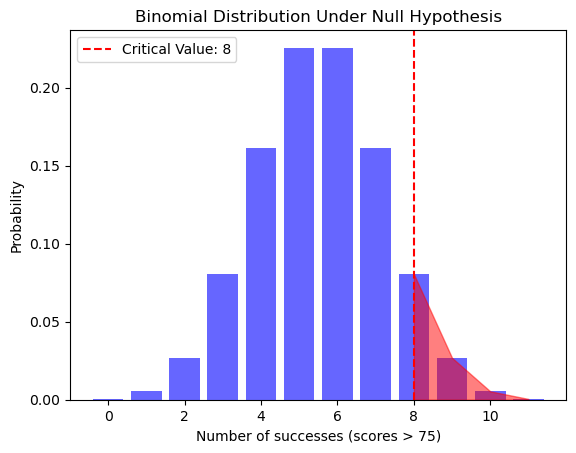

In [9]:
plt.bar(x, pmf, color='blue', alpha=0.6)
plt.axvline(critical_value, color='red', linestyle='dashed', label=f'Critical Value: {critical_value:.0f}')
plt.fill_between(x, 0, pmf, where=(x >= critical_value), color='red', alpha=0.5)
plt.xlabel('Number of successes (scores > 75)')
plt.ylabel('Probability')
plt.title('Binomial Distribution Under Null Hypothesis')
plt.legend()
plt.show()

In [11]:
# Compute p-value
p_value = 1 - binom.cdf(n_greater - 1, n, 0.5)
p_value

0.11328125

In [12]:
# Conclusion
reject_null = p_value < alpha  # Determine whether to reject the null hypothesis

In [13]:
reject_null

False

At the 5% significance level, there is not enough evidence to support the claim that there is a statistically significant difference in final exam scores for the new online curriculum.